In [23]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df_airbnb = pd.read_csv('./JOBSHEET/UTS/airbnb.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Check Data Info

In [4]:
df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

---

In [8]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
x, y = df_airbnb.shape
print(f'Total Baris : {x}')
print(f'Total Kolom : {y}')

Total Baris : 48895
Total Kolom : 16


In [109]:
df_airbnb.fillna(0).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,2018.0,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,2019.0,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,2019.0,7.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,2018.0,11.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22 00:00:00,0.59,1,129,2019.0,6.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05 00:00:00,0.40,1,0,2017.0,10.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24 00:00:00,3.47,1,220,2019.0,6.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21 00:00:00,0.99,1,0,2017.0,7.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09 00:00:00,1.33,4,188,2019.0,6.0


In [112]:
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')
df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019.0,6.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2017.0,10.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,2019.0,6.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,2017.0,7.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,2019.0,6.0


In [116]:
df_airbnb['year'] = df_airbnb['last_review'].dt.year
df_airbnb['month'] = df_airbnb['last_review'].dt.month
df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019.0,6.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2017.0,10.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,2019.0,6.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,2017.0,7.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,2019.0,6.0


In [114]:
df_active = df_airbnb[df_airbnb['availability_365'] > 0]
df_active.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019.0,6.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,2019.0,6.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,2019.0,6.0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,2019.0,6.0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39,2019.0,6.0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,2019.0,6.0


In [25]:
df_numerik = df_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()
df_numerik.round(0)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,153.0,7.0,23.0,1.0,7.0,113.0
std,240.0,21.0,45.0,2.0,33.0,132.0
min,0.0,1.0,0.0,0.0,1.0,0.0
25%,69.0,1.0,1.0,0.0,1.0,0.0
50%,106.0,3.0,5.0,1.0,1.0,45.0
75%,175.0,5.0,24.0,2.0,2.0,227.0
max,10000.0,1250.0,629.0,58.0,327.0,365.0


DATA DENGAN HARGA TERMAHAL

In [13]:
df_mahal = df_airbnb.sort_values(by='price',  ascending=False).head(10).set_index('name')
df_mahal

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
name,,,,,,,,,,,,,,,
1-BR Lincoln Center,22436899,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
Furnished room in Astoria apartment,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
Luxury 1 bedroom apt. -stunning Manhattan views,13894339,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
Spanish Harlem Apt,4737930,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
2br - The Heart of NYC: Manhattans Lower East Side,31340283,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
"Quiet, Clean, Lit @ LES & Chinatown",9528920,3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,23377410,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
Film Location,2953058,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
East 72nd Townhouse by (Hidden by Airbnb),22779726,156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146


DATA DENGAN HARGA TERMURAH

In [14]:
df_murah = df_airbnb.sort_values(by='price',  ascending=True).head(10).set_index('name')
df_murah

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
name,,,,,,,,,,,,,,,
Coliving in Brooklyn! Modern design / Shared room,21291569,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
"Sunny, Quiet Room in Greenpoint",20608117,1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
Best Coliving space ever! Shared room.,21304320,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139
★Hostel Style Room | Ideal Traveling Buddies★,20333471,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
the best you can find,20933849,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
"Huge Brooklyn Brownstone Living, Close to it all.",18750597,8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
Cozy yet spacious private brownstone bedroom,20639914,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
Spacious comfortable master bedroom with nice view,20639628,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",20523843,15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0


DATA DENGAN PERSEBARAN KOTA TERBANYAK

In [117]:
list_kota = df_airbnb['neighbourhood_group'].value_counts().reset_index()
list_kota.columns = ['name', 'total']
df_total = pd.DataFrame(list_kota)
df_total.head(10).set_index('name')


,total
name,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


DATA DENGAN KETERSEDIAAN TERBANYAK

In [21]:
df_sedia = df_airbnb.sort_values(by='availability_365',  ascending=False).head(10).set_index('name')
df_sedia

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
name,,,,,,,,,,,,,,,
Heaven for you(only for guy),36473253,261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,NaN,NaN,6,365
"Penthouse Flat, Million-$-View, Best Area!",4339924,22530714,Murad,Brooklyn,Bushwick,40.69890,-73.92904,Entire home/apt,200,90,91,2016-10-04,1.59,1,365
Specious 4-people room in nice surrounding,31845412,27974952,Alex,Brooklyn,East Flatbush,40.64434,-73.95040,Shared room,31,30,0,NaN,NaN,7,365
Vibrant Private Bedroom in UWS 107,31877856,238321374,Eyal,Manhattan,Upper West Side,40.80008,-73.95926,Private room,60,30,1,2019-06-16,1.00,32,365
West Village Studio on quiet cobblestone street,36453952,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,NaN,NaN,1,365
CENTRAL PARK / COLUMBUS CIRCLE /1BR,12672036,1475015,Mike,Manhattan,Hell's Kitchen,40.76747,-73.98613,Entire home/apt,87,30,2,2018-05-30,0.06,52,365
Spacious 3 Bedroom in Park Slope,12648471,52577563,Rosa,Brooklyn,Sunset Park,40.66455,-73.99205,Entire home/apt,135,4,9,2017-10-07,0.23,3,365
Chic and cozy,31835917,26317294,Denise,Manhattan,Upper West Side,40.77796,-73.98213,Private room,95,275,0,NaN,NaN,1,365
Crown heights apt,31815470,44801404,Idris,Brooklyn,Crown Heights,40.66897,-73.92848,Private room,130,14,0,NaN,NaN,1,365


DATA DENGAN MINIMAL MALAM UNTUK SEWA TEMPAT TERTINGGI

In [119]:
df_malam = df_airbnb.sort_values(by='minimum_nights', ascending=False).head(10).set_index('name')
df_malam

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
name,,,,,,,,,,,,,,,,,
Prime W. Village location 1 bdrm,4204302,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365,2014.0,11.0
NaN,1615764,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,NaN,1,362,NaN,NaN
Historic Designer 2 Bed. Apartment,10053943,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42,2018.0,1.0
Beautiful place in Brooklyn! #2,20990053,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249,2018.0,6.0
Shared Studio (females only),30378211,200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaT,NaN,1,365,NaN,NaN
Beautiful Fully Furnished 1 bed/bth,5431845,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90,2018.0,6.0
Peaceful apartment close to F/G,11096888,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaT,NaN,1,358,NaN,NaN
Zen Room in Crown Heights Brooklyn,8668115,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365,2016.0,9.0
Wonderful Large 1 bedroom,6169897,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaT,NaN,1,362,NaN,NaN


VISUALISASI DATA

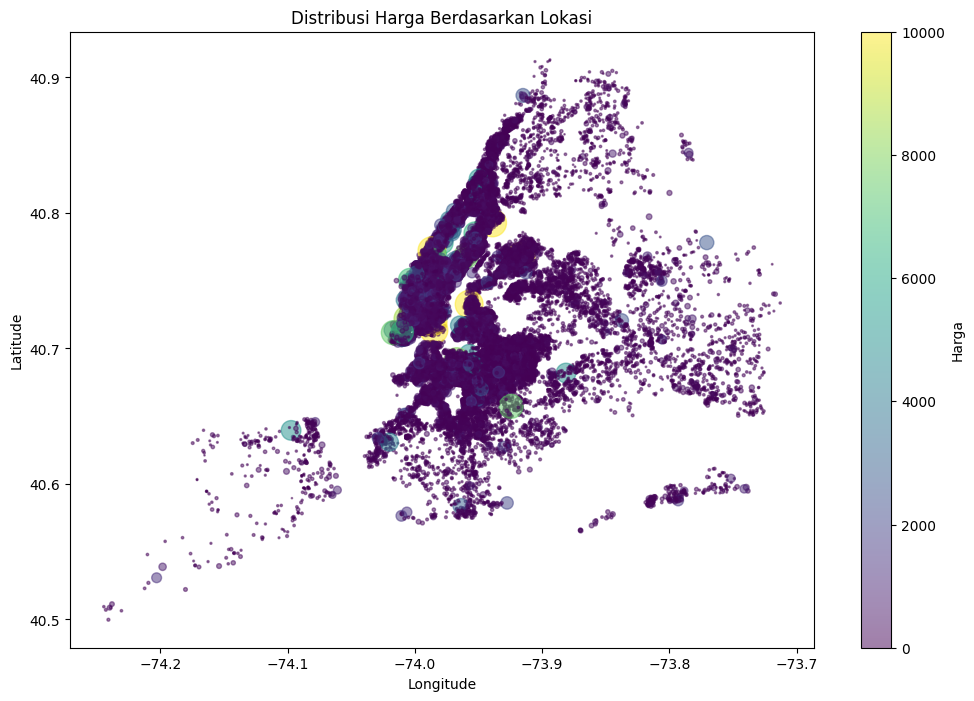

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(df_airbnb['longitude'], df_airbnb['latitude'], c=df_airbnb['price'], 
            cmap='viridis', alpha=0.5, s=df_airbnb['price']/25)
plt.colorbar(label='Harga')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribusi Harga Berdasarkan Lokasi')
plt.show()

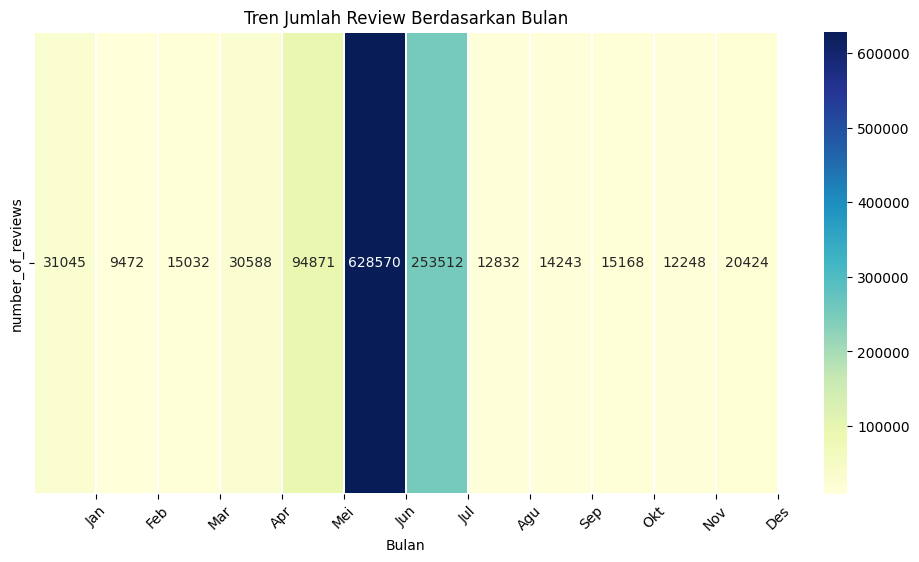

In [ ]:
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'])

review_trend = df_airbnb.groupby(df_airbnb['last_review'].dt.month)['number_of_reviews'].sum()

review_trend = review_trend.sort_index()
heatmap_data = pd.DataFrame(review_trend, index=range(1,13))
heatmap_data.index.name = 'Bulan'

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.1)
plt.title('Tren Jumlah Review Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
#
plt.show()

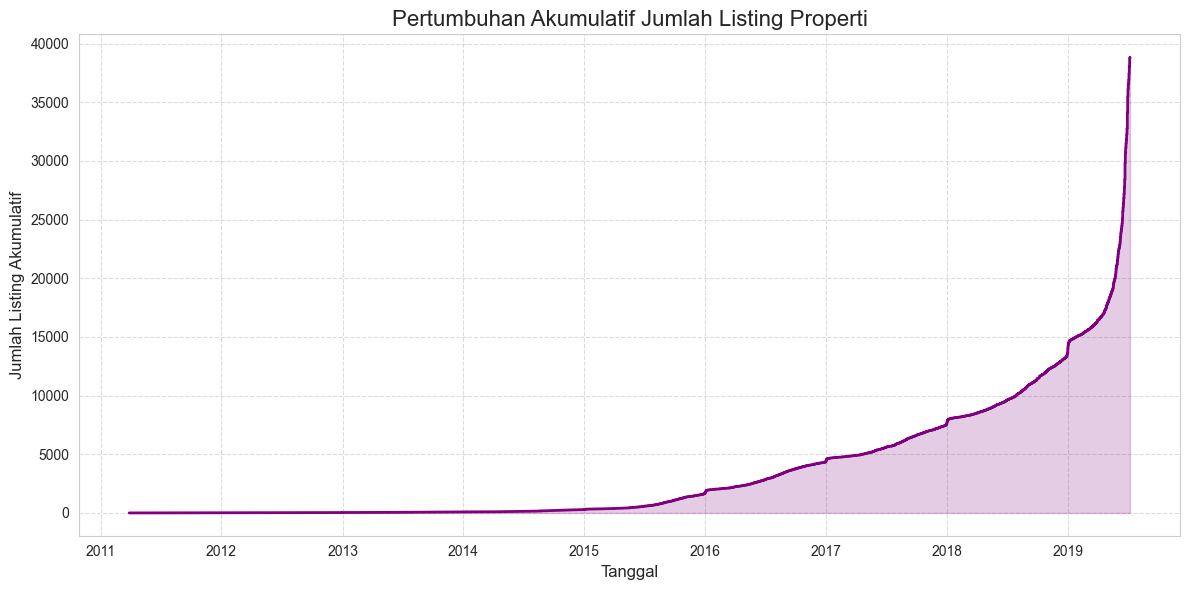

In [90]:
df_sorted = df_airbnb.sort_values('last_review')
df_sorted['cumulative_listings'] = range(1, len(df_sorted)+1)

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['last_review'], df_sorted['cumulative_listings'], color='purple', linewidth=2)
plt.fill_between(df_sorted['last_review'], df_sorted['cumulative_listings'], alpha=0.2, color='purple')
plt.title('Pertumbuhan Akumulatif Jumlah Listing Properti', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Listing Akumulatif', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

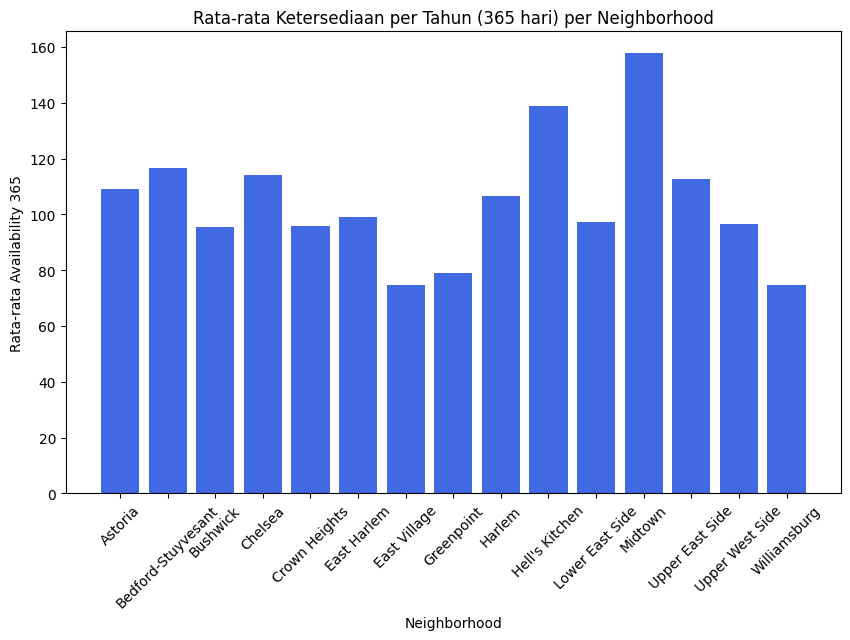

In [ ]:
top_neighborhoods = df_airbnb['neighbourhood'].value_counts().head(15).index
df_filtered = df_airbnb[df_airbnb['neighbourhood'].isin(top_neighborhoods)]

pivot_table = df_filtered.pivot_table(values='availability_365', index='neighbourhood', aggfunc='mean')

plt.figure(figsize=(10,6))
plt.bar(pivot_table.index, pivot_table['availability_365'], color='royalblue')
plt.title('Rata-rata Ketersediaan per Tahun (365 hari) per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Rata-rata Availability 365')
plt.xticks(rotation=45)
plt.show()

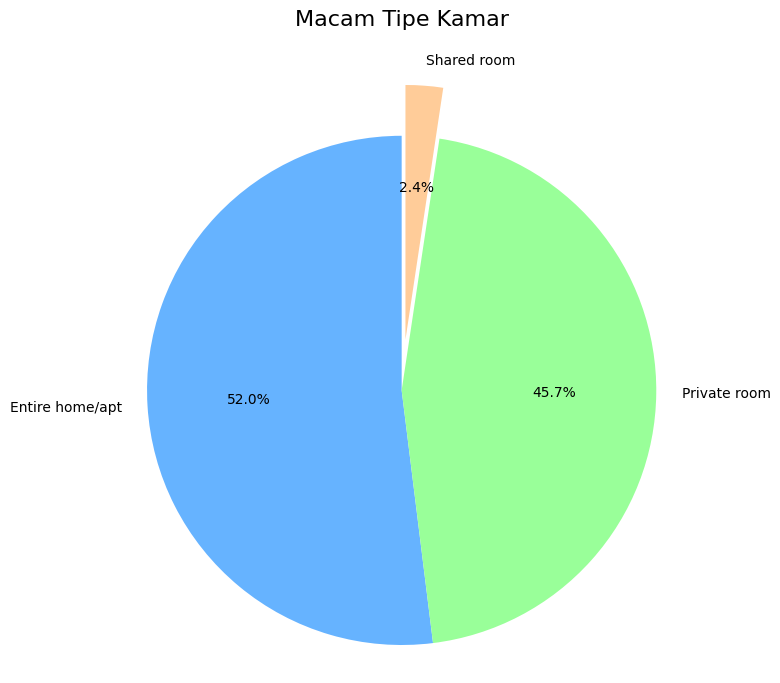

In [83]:
kamar = df_airbnb['room_type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(kamar, 
         labels=kamar.index,
         autopct='%1.1f%%',
         startangle=90,
         colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'],
         explode=(0, 0, 0.2))
plt.title('Macam Tipe Kamar\n', fontsize=16)
plt.axis('equal')
plt.show()

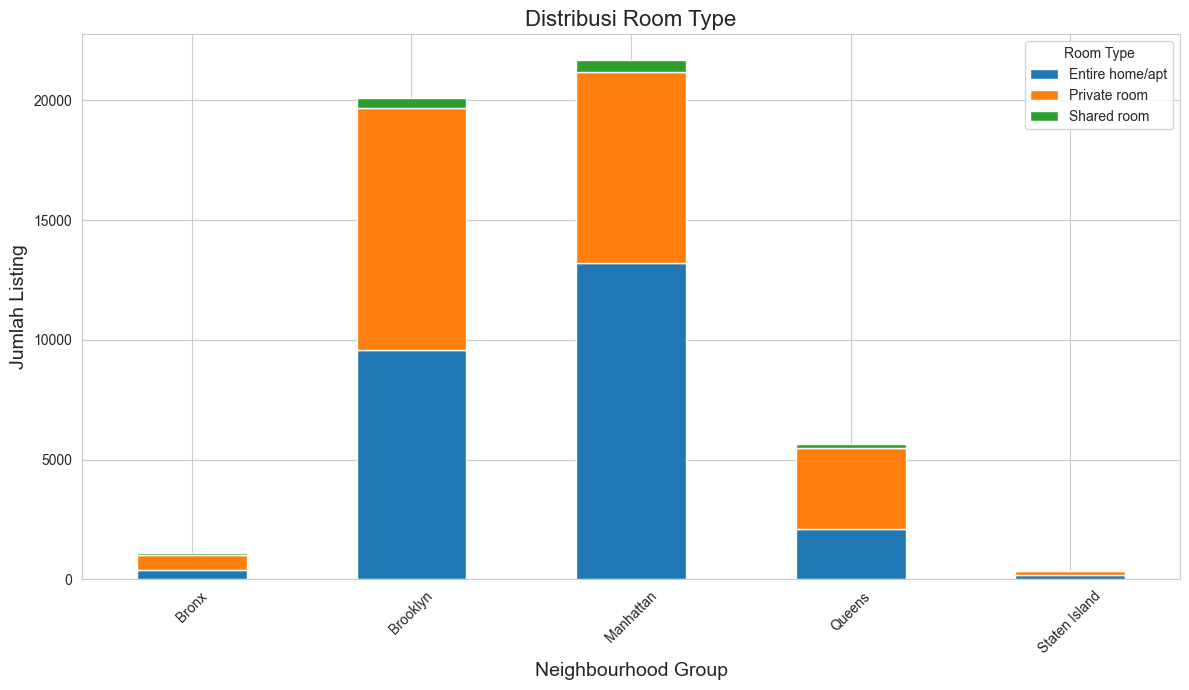

In [115]:
pivot_data = df_airbnb.pivot_table(
    index='neighbourhood_group',
    columns='room_type',
    aggfunc='size',
    fill_value=0
)

# Membuat plot stacked bar
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 7))

# Menambahkan judul dan label
plt.title('Distribusi Room Type', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Jumlah Listing', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Room Type')

# Menampilkan plot
plt.tight_layout()
plt.show()